In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, classification_report

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [4]:
df =  pd.read_csv('../data/train_use.csv')

In [5]:
df_encoded = df.copy()

# Aplicar LabelEncoder a todas las variables categóricas
encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

df_encoded.head()

,clase,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bruises
0,0,2,2,8,0,1,0,0,0,0,...,3,7,7,2,0,3,1,2,0,1
1,0,0,2,7,1,1,0,0,1,0,...,3,7,7,2,0,3,1,2,2,1
2,0,2,2,3,0,1,1,0,0,1,...,3,7,7,2,0,0,1,0,0,0
3,0,2,1,8,0,1,0,0,1,0,...,3,7,7,2,0,3,0,2,0,1
4,0,0,2,7,0,1,0,0,4,0,...,3,7,7,2,0,3,0,2,2,1


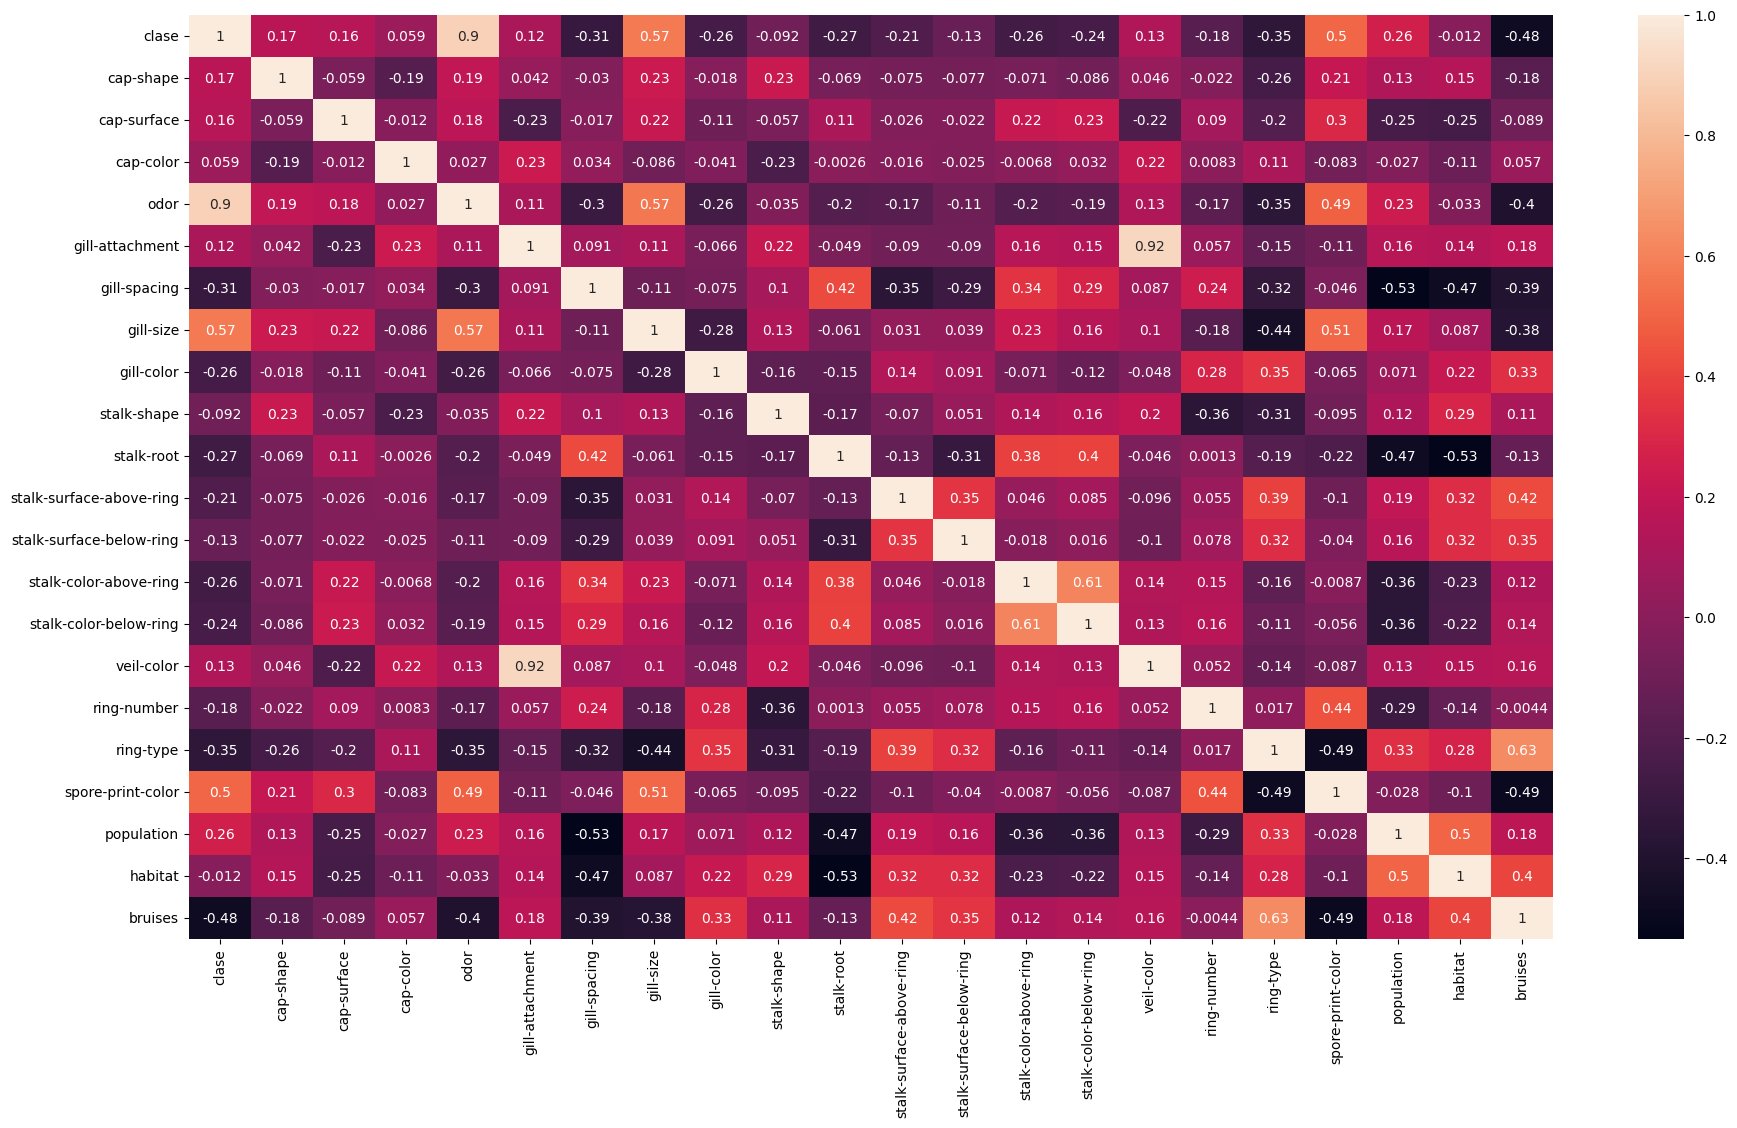

In [6]:
plt.figure(figsize=(22,12))

df_corr = df_encoded.corr()

sns.heatmap(df_corr,annot=True);

In [7]:
df_encoded['clase'].value_counts(normalize=True)

clase
0    0.645231
1    0.354769
Name: proportion, dtype: float64

In [8]:
X = df_encoded.drop(columns=['clase','odor','stalk-root','ring-number'])
y = df_encoded['clase']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_pca.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_data=(X_test_pca, y_test), verbose=1)

y_pred = (model.predict(X_test_pca) > 0.5).astype("int32")

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8164 - loss: 0.4027 - val_accuracy: 0.9414 - val_loss: 0.1443
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - loss: 0.1176 - val_accuracy: 0.9674 - val_loss: 0.0843
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9768 - loss: 0.0658 - val_accuracy: 0.9848 - val_loss: 0.0552
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9913 - val_loss: 0.0407
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9957 - loss: 0.0259 - val_accuracy: 0.9946 - val_loss: 0.0316
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0188 - val_accuracy: 0.9957 - val_loss: 0.0274
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0141 - val_accuracy: 0.9978 - val_loss: 0.0251
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0115 - val_accuracy: 0.

In [12]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       628
           1       1.00      0.99      1.00       293

    accuracy                           1.00       921
   macro avg       1.00      1.00      1.00       921
weighted avg       1.00      1.00      1.00       921

[[628   0]
 [  2 291]]
